In [1]:
import pandas as pd
import numpy as np
import pylab 
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

In [2]:
dataset_df=pd.read_csv('letter-recognition.csv')

In [3]:
dataset_df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
dataset_df.columns

Index(['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')

In [5]:
df=dataset_df
del df['lettr']

In [6]:
from sklearn import preprocessing 
X_norm=preprocessing.normalize(df, norm='l2')

In [21]:
params=["pixel77","pixel777"]

In [8]:
df_norm=pd.DataFrame(X_norm)
df_norm.columns=dataset_df.columns

In [23]:
twovar=np.array([df_norm[params[0]],df_norm[params[1]]])

In [24]:
twovar=twovar.T

In [25]:
ee=EllipticEnvelope()
ee.fit(twovar)

EllipticEnvelope()

In [26]:
twovar.shape

(70000, 2)

In [27]:
gimme=df_norm["pixel43"]

In [28]:
biv_outliters_mask=ee.predict(twovar)==-1
biv_outliters_data=twovar[biv_outliters_mask]
biv_outliters_name=gimme[biv_outliters_mask]

In [29]:
xx,yy=np.meshgrid(np.linspace(twovar[:,0].min(),
                              twovar[:,0].max(),1000),
                  np.linspace(twovar[:,1].min(),
                              twovar[:,1].max(),1000))
zz=ee.decision_function(np.c_[xx.ravel(),yy.ravel()])
zz=zz.reshape(xx.shape)

Text(0, 0.5, 'pixel777')

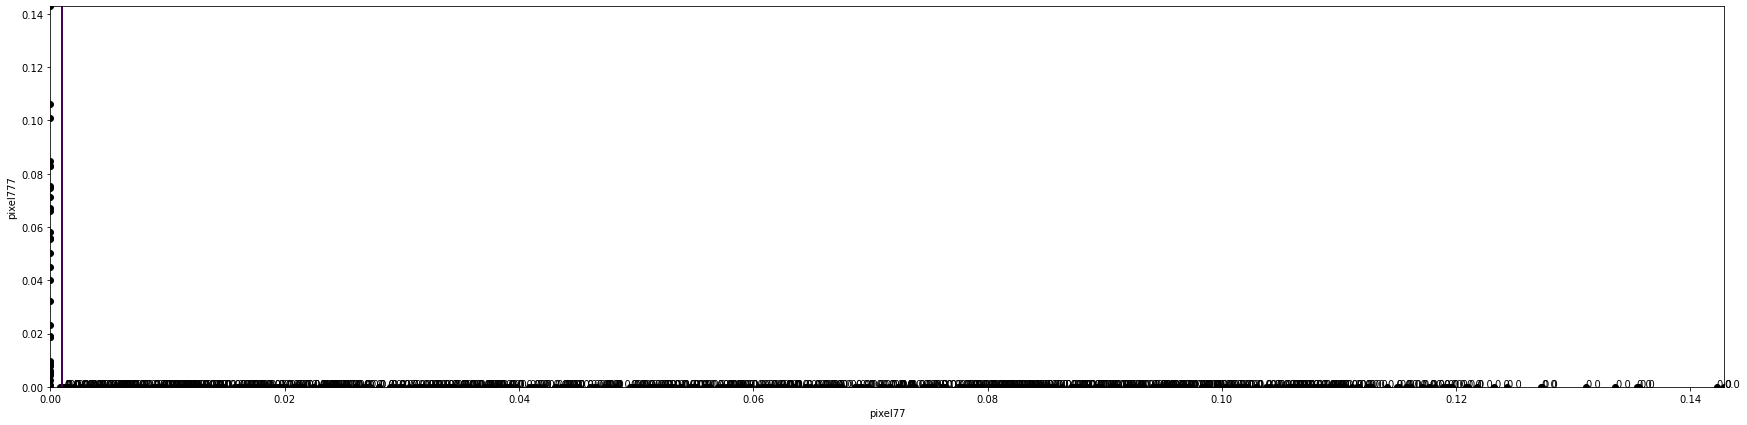

In [36]:
fig=pylab.figure(figsize=(30,7))
ax=fig.add_subplot(1,1,1)
for name, xy in zip(biv_outliters_name,
                   biv_outliters_data):
    ax.text(xy[0],xy[1],name)
ax.contour(xx,yy,zz,levels=[0],linewidths=2)
ax.scatter(twovar[:,0],twovar[:,1],color='black')
ax.set_xlabel(params[0])
ax.set_ylabel(params[1])

In [9]:
ocsvm=OneClassSVM(kernel='rbf',gamma='auto')

In [10]:
X=np.array(df_norm)

In [11]:
ocsvm.fit(X)

OneClassSVM(gamma='auto')

In [12]:
gimmik=df_norm["x-box"]

In [13]:
outliers=gimmik[ocsvm.predict(X)==-1]

In [15]:
print(gimmik.shape,outliers.shape)

(20000,) (9999,)


In [16]:
x=outliers.index

In [17]:
x=np.array(x)
y=np.array(outliers)

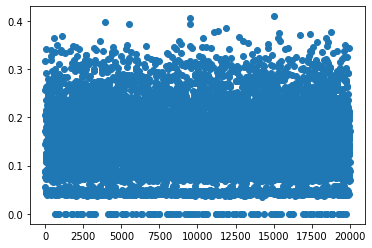

In [18]:
from matplotlib import pyplot as plt
plt.scatter(x, y)
plt.show()